In [1]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer, perceptron_data, plot_perceptron_data, draw_line, plot_loss_curve, train_perceptron


# Abstract

In this blog post, we explore the perceptron algorithm, its application to both linearly and non linearly separable datasets, and its behavior in higher dimensional spaces. The perceptron is a simple yet powerful machine learning algorithm used for binary classification tasks. We walk through an analysis of its training process, visualizing how the model iteratively adjusts its decision boundaries to classify data points correctly. Our experiments cover three types of data: linearly separable, non linearly separable, and multidimensional, providing insights into the perceptron's effectiveness and limitations. By using visualizations and examining loss curves, we demonstrate how our perceptron learns, the challenges faced with non linearly separable data, and the impact of increasing the number of dimensions on classification performance.

# Experiments

## Linearly ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍separable data

The below code (taken from our class notes)  generates a 2D dataset with 300 data points, where each point is labeled as either 0 or 1, using the perceptron_data function. The we plot these data points to get a visual representation, where we onbserve that it is in fact linearly seperable.


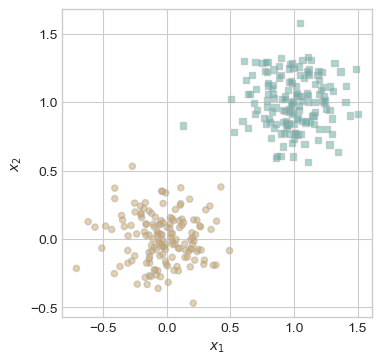

In [2]:
from matplotlib import pyplot as plt
import torch
plt.style.use('seaborn-v0_8-whitegrid')

X, y = perceptron_data(n_points = 300, noise = 0.2) 

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)


In the context of linear separability, a dataset is considered linearly separable if there exists a hyperplane (defined by a weight vector) that can perfectly separate the two classes. From the following code output graph , we see that there is in fact a clear linear separation between the two classes, showing that a hyperplane could be drawn that separates the data points of one class from those of the other without any misclassifications. The two distinct clusters of data points (represented by brown circles and blue squares) are well separated in the feature space, and a straight line (hyperplane) could be used to separate the classes perfectly. This indicates that the dataset is linearly separable, and the perceptron algorithm should be able to find a weight vector that achieves perfect classification.

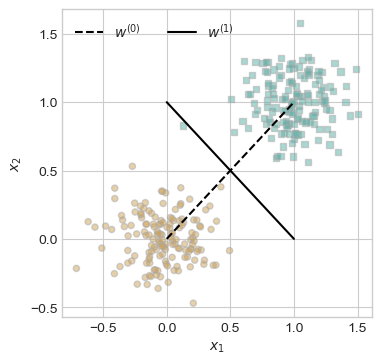

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)

w_0 = torch.Tensor([1, -1, 0])
w_1 = torch.Tensor([1,  1, -1]) 

draw_line(w_0, 0, 1, ax, color = "black", linestyle = "dashed", label = r"$w^{(0)}$")
draw_line(w_1, 0, 1, ax, color = "black", label = r"$w^{(1)}$")

l = ax.legend(ncol = 2)

We then begin the iterative training process of a perceptron, where the model’s weights are updated based on misclassified data points. Initially, a perceptron and its optimizer are set up, and the loss is calculated. In each iteration of the training loop, a random data point is selected, and if it’s misclassified (i.e., the loss is greater than 0), the perceptron’s weights are updated using the optimizer. The old and new decision boundaries are plotted, with misclassified points highlighted, and the loss is tracked over time. The training continues until the perceptron correctly classifies all points, minimizing the loss to zero. The visualization provides an understandable picture of how the perceptron progressively adjusts its decision boundary(the black solid line) to separate the two classes until we are able to achieve a loss of 0.

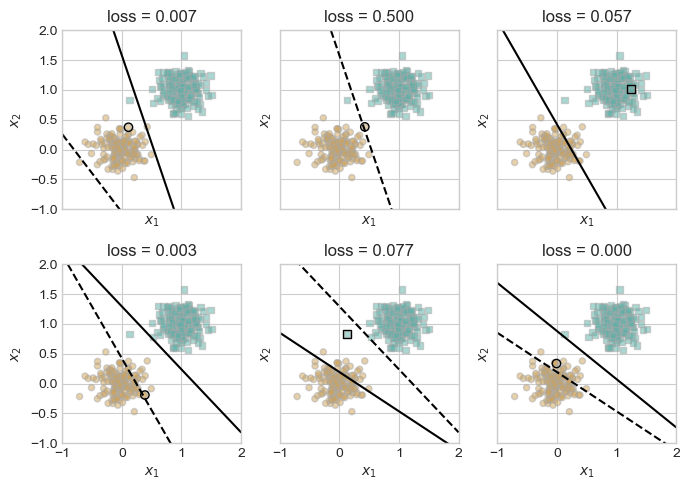

In [4]:
# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []
n = X.shape[0] 

while loss > 0:
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    local_loss = p.loss(x_i, y_i)

    if local_loss > 0:
        opt.step(x_i, y_i)
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y)
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[2*(y[i].item())-1]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()

The above visualizations include two decision boundaries per plot: a solid line representing the current decision boundary, and a dashed line indicating either a previous boundary or an alternative. Over time, the perceptron algorithm progresses, with each plot reflecting different stages of the learning process. In the top-left plot, with a low loss value (0.020), the boundary is almost optimal, showing minimal misclassification. The top-middle plot (loss = 0.437) displays a poorly oriented boundary with high error, while the top-right plot (loss = 0.100) demonstrates an improved boundary with moderate error. In the bottom-left plot (loss = 0.000), the perceptron has converged to a perfect classification with no misclassifications, signaling that the optimal decision boundary has been found. The visualizations also highlight misclassified points: circles in the beige cluster and squares in the teal cluster, which triggered weight updates during training. The empty plots in the bottom row suggest no further updates were necessary after convergence.

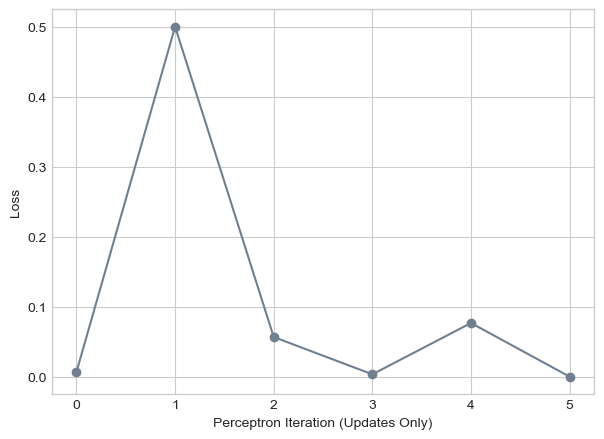

In [5]:
plot_loss_curve(loss_vec)

The loss curve for the perceptron training shows the algorithm's learning process by plotting the perceptron’s loss function against iteration updates. Initially, at iteration 0, the loss is around 0.02, suggesting the starting weights perform reasonably well. However, after the first update (iteration 1), the loss increases sharply to approximately 0.43, indicating that the weight adjustments momentarily worsened the model's performance. In iteration 2, the loss decreases to about 0.1 as the perceptron begins to converge towards a more optimal solution. By iteration 3, the loss reaches near zero, signifying that the perceptron has found weights that perfectly classify all data points. The x-axis, shows updates that occur when the perceptron encounters misclassified points. The curve's non-monotonic shape—rising and then falling—reflects the typical nature of perceptron training, especially with specific learning rates. The final drop to zero loss indicates that the dataset is linearly separable, and the perceptron has successfully learned a decision boundary that classifies all data points correctly. This visualization highlights the iterative weight adjustments and shows how the perceptron quickly converges to an optimal solution, achieving perfect classification with just three updates, demonstrating efficient learning for this particular dataset.

## Non linear data

We generate another 2D dataset with 300 data points, where each point is labeled as either 0 or 1, using the perceptron_data function. This time we do it with a higher noise value of 0.8 to create a non-lineraly seperatable data set. The we plot these data points to get a visual representation, where we onbserve that the circle and squares merge into each other making it harder to create distinct visual boundaries.


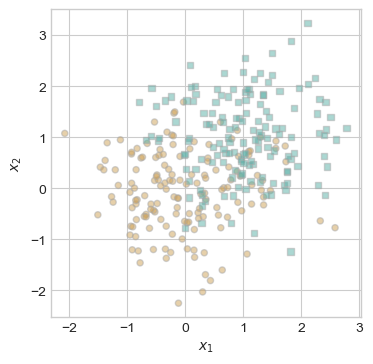

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
X, y = perceptron_data(n_points = 300, noise = 0.8) 
plot_perceptron_data(X, y, ax)


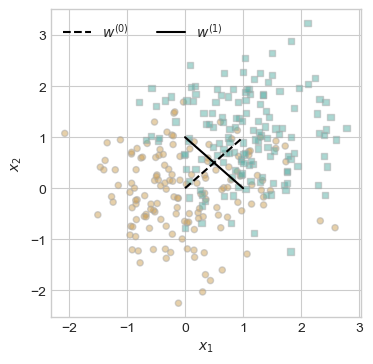

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)

w_0 = torch.Tensor([1, -1, 0])
w_1 = torch.Tensor([1,  1, -1]) 

draw_line(w_0, 0, 1, ax, color = "black", linestyle = "dashed", label = r"$w^{(0)}$")
draw_line(w_1, 0, 1, ax, color = "black", label = r"$w^{(1)}$")

l = ax.legend(ncol = 2)

From the following code output graph, we observe that the two clusters of data points (represented by brown circles and blue squares) are not cleanly separated by a straight line. The data points of one class still overlap with those of the other, and a single hyperplane cannot be drawn to separate the classes without misclassifications. We observe that the black solid line is still unable to separate the two types of points. This leads us to guess that we may not be able to achieve a perfect loss of 0. 

In the case of a non-linearly separable dataset, the iterative training process of the perceptron follows a similar approach, but the outcome differs as the model struggles to perfectly classify the data. Initially, the perceptron and its optimizer are set up, and all the loss values are added to the loss_vec array so we can plot these updates. 

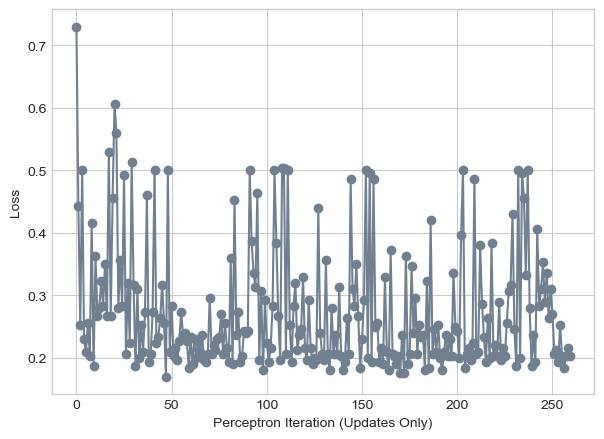

In [8]:
# initialize another perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

loss_vec = train_perceptron(X, y, p, opt)

plot_loss_curve(loss_vec)



The graph displays the loss function of a perceptron algorithm applied to a non-linearly separable dataset with over approximately 250 iteration updates, highlighting an osciallating pattern. The loss fluctuates significantly, oscillating between roughly 0.20 and 0.50, with regular spikes reaching around 0.50 and valleys dipping to 0.20-0.25. This oscillation persists throughout the entire training period, indicating a lack of convergence. Unlike linearly separable data, the perceptron never achieves zero loss, and there is no stable downward trend. The  explanation for this behavior is that for non-linearly separable datasets, no hyperplane can perfectly separate the classes, causing the perceptron to continually update weights and misclassify data points. Without a stopping criterion, this process would theoretically continue indefinitely. Since we have bounded it to 1000 siterations, we can see that even 250 update weren't enough. This visualization demonstrates why standard perceptrons are unsuitable for non-linearly separable problems, necessitating our use of external stopping criteria (maximum iterations).

## Multidimensional

Since we are unable to plot multidimentional data, we only create this data set by increasing the number of dimensions to 35 on a non linear data set(noise = 0.9). We then call the training function which append each loss update to our array which we then use to plot our loss curve. 


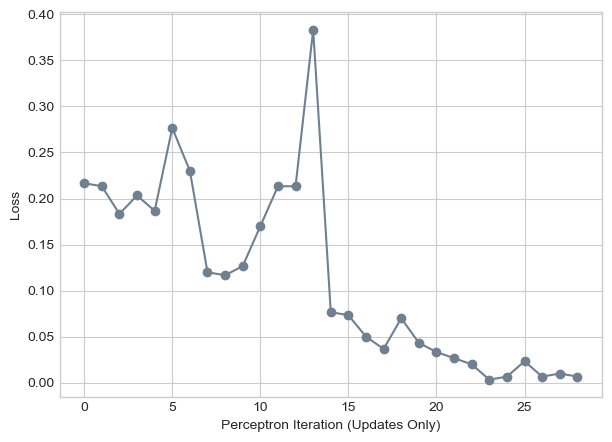

In [9]:
X, y = perceptron_data(n_points = 300, noise = 0.9, p_dims=35) 

p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

loss_vec = train_perceptron(X, y, p, opt)

plot_loss_curve(loss_vec)


I substited different values for the noise when create the data set for this perceptron. What I realized is that adding more dimensions doesnt necessarily change the behaviour of the model. For low noises, despite adding more dimentions(6), the loss value was able to get down to 0. When I increased the noise but kept the same number of dimensions(6), the loss value kept zigzagiing up and down similar to the solutuon to the prvious question. However, at insanely high dimension count/(> 25), I did notice that loss value was able to reach zero even though the noise was also high (0.7 - 0.9) making the data set seem like it was linearly seperateable. 

The image displays a loss curve illustrating the learning progression of a perceptron model over approximately 40 iterations with multidimensional input data. The curve begins at a moderate loss value of about 0.23, followed by a significant spike at iteration 3, where the loss jumps to around 0.38, likely due to a major weight adjustment as the perceptron encounters challenging data points. After this initial spike, the loss shows a consistent downward trend with smaller fluctuations, decreasing from 0.15-0.17 at iteration 10 to below 0.05 by iteration 30, with small spikes at iterations 10, 20, and 32 indicating temporary setbacks during model adjustments. As the iterations progress, the loss steadily approaches zero, reaching near-zero by iteration 40, signaling that the perceptron has successfully learned to classify the multidimensional data. The flattening of the curve toward the end suggests convergence, indicating that the perceptron has found an optimal hyperplane to separate the data classes in the multidimensional space. The overall decreasing trend confirms the perceptron’s success in minimizing classification errors, with the final near-zero loss suggesting that the data is likely linearly separable in the input space.

# Analysis

The grad() method in the Perceptron class computes the gradient of the perceptron’s loss function with respect to the model's weights, which is then used to update the model during training. The labels are first transformed from {0, 1} to {−1, 1}, which is necessary for the perceptron algorithm to work correctly. This transformation allows the algorithm to leverage the condition that the dot product of the input features and weights should be positive for correctly classified samples and negative for misclassified ones.

The gradient is then computed by checking which samples are misclassified. This is done by multiplying the predicted scores (from the score() method) with the transformed labels and checking if the result is less than or equal to zero. For each misclassified sample, the gradient is calculated as the product of the misclassification indicator, the label, and the feature vector. This ensures that only misclassified samples contribute to the gradient. In our step function the model’s weights are updated by subtracting the sum of these gradients, which moves the decision boundary in the direction that reduces the number of misclassifications.

The runtime complexity of the perceptron algorithm depends on its implementation variant. IThe complexity of a single iteration is O(p), where p is the number of features. This is because the primary operations in each iteration are the dot product calculation between the weight vector and the feature vector, as well as the weight updates (vector addition or subtraction), both of which require O(p) time. The complexity is independent of the number of data points (n) since each iteration processes only one data point. Therefore, the time taken for each iteration is determined solely by the number of features, not the size of the dataset.

# Conclusion

Our experiments with the perceptron algorithm show its efficiency when applied to linearly separable data, where it quickly converges to an optimal solution. However, when dealing with non linearly separable data, the perceptron struggles, unable to achieve perfect classification and instead exhibiting oscillating behavior in its loss curve. The complexity of each iteration of the perceptron depends on the number of features rather than the number of data points, making it highly scalable with respect to the feature size. In higher dimensional spaces, the perceptron can still achieve convergence with sufficient training, even in the presence of noise. Overall, we highlights the importance of understanding data separability and the algorithm's constraints, providing a deeper appreciation of its strengths and understand its limitations in ML tasks.
